In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('../Data/Credit.csv')

In [4]:
selected_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "PAYMENTS"]
df_selected = df[selected_features] # kupilih 4 karena =.= kebanyakan kalo make semua

In [5]:
df_selected

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS
0,40.900749,95.40,0.000000,201.802084
1,3202.467416,0.00,6442.945483,4103.032597
2,2495.148862,773.17,0.000000,622.066742
3,1666.670542,1499.00,205.788017,0.000000
4,817.714335,16.00,0.000000,678.334763
...,...,...,...,...
8945,28.493517,291.12,0.000000,325.594462
8946,19.183215,300.00,0.000000,275.861322
8947,23.398673,144.40,0.000000,81.270775
8948,13.457564,0.00,36.558778,52.549959


In [6]:
df_selected = df_selected.fillna(df_selected.median())

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

In [9]:
print(pd.DataFrame(X_scaled).isna().sum().sum())

0


In [10]:
from sklearn.cluster import KMeans

In [11]:
best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Cluster {k} = Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

Cluster 2 = Silhouette Score = 0.6264
Cluster 3 = Silhouette Score = 0.5727
Cluster 4 = Silhouette Score = 0.5484
Cluster 5 = Silhouette Score = 0.5571
Cluster 6 = Silhouette Score = 0.4323
Cluster 7 = Silhouette Score = 0.4154
Cluster 8 = Silhouette Score = 0.4218
Cluster 9 = Silhouette Score = 0.4366
Cluster 10 = Silhouette Score = 0.4284


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

In [15]:
eps_value = 0.5
min_samples_value = 8 # umumnya dipakai 2 x jumlah fitur

In [16]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

In [17]:
print(np.unique(labels))

[-1  0  1  2  3]


In [18]:
n_clusters_2d = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_2d = list(labels).count(-1)

In [19]:
print(f'\nEstimasi jumlah cluster: {n_clusters_2d}')
print(f'Estimasi jumlah noise points: {n_noise_2d}')


Estimasi jumlah cluster: 4
Estimasi jumlah noise points: 678


In [20]:
if n_clusters_2d > 1:
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {score:.3f}')
else:
    print('Silhouette Score tidak dapat dihitung karena hanya ditemukan 1 cluster atau kurang.')


Silhouette Score: 0.433


In [21]:
eps_values = np.arange(0.3, 1.5, 0.1)       # Coba nilai eps dari 0.3 sampai 1.4
min_samples_values = range(3, 10)           # Min samples dari 3 sampai 9

max_iter = 50   # Maksimal iterasi untuk grid search. Sebenernya, kalo mo GA make ini gpp. cuman, jadinya 300 an iterasi
count = 0

In [22]:
best_score = -1
best_params = None

In [ ]:
for eps in eps_values:
    for min_samples in min_samples_values:
        if count >= max_iter:
            break
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        
        if n_clusters > 1:
            mask = labels != -1
            score = silhouette_score(X_scaled[mask], labels[mask])

            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
        count += 1

In [24]:
f"Best DBSCAN Silhouette Score: {best_score:.4f} dengan eps={best_params[0]} dan min_samples={best_params[1]}"

'Best DBSCAN Silhouette Score: 0.7729 dengan eps=0.4 dan min_samples=8'

In [25]:
dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
df["DBSCAN_Cluster_Optimal"] = dbscan.fit_predict(X_scaled)
print("Distribusi cluster DBSCAN optimal:")
df["DBSCAN_Cluster_Optimal"].value_counts()

Distribusi cluster DBSCAN optimal:


DBSCAN_Cluster_Optimal
 0    8028
-1     914
 1       8
Name: count, dtype: int64

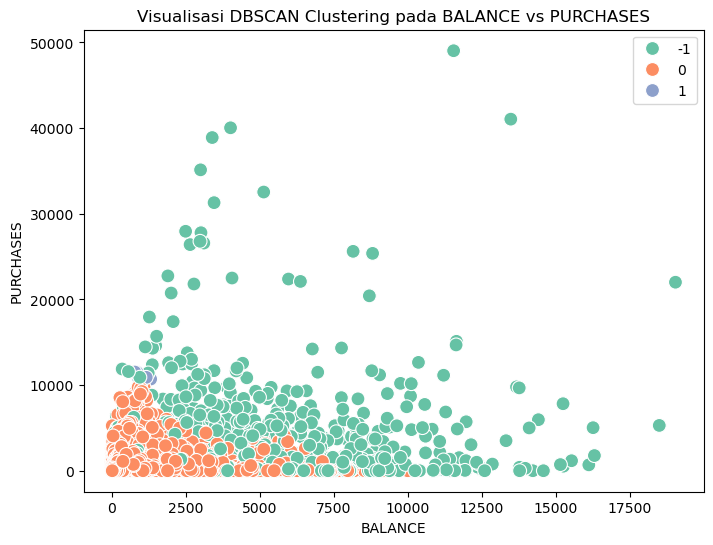

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df.copy()
df_plot["Cluster"] = df["DBSCAN_Cluster_Optimal"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="BALANCE",
    y="PURCHASES",
    hue="Cluster",
    palette="Set2",
    s=100
)
plt.title("Visualisasi DBSCAN Clustering pada BALANCE vs PURCHASES")
plt.legend()
plt.show()

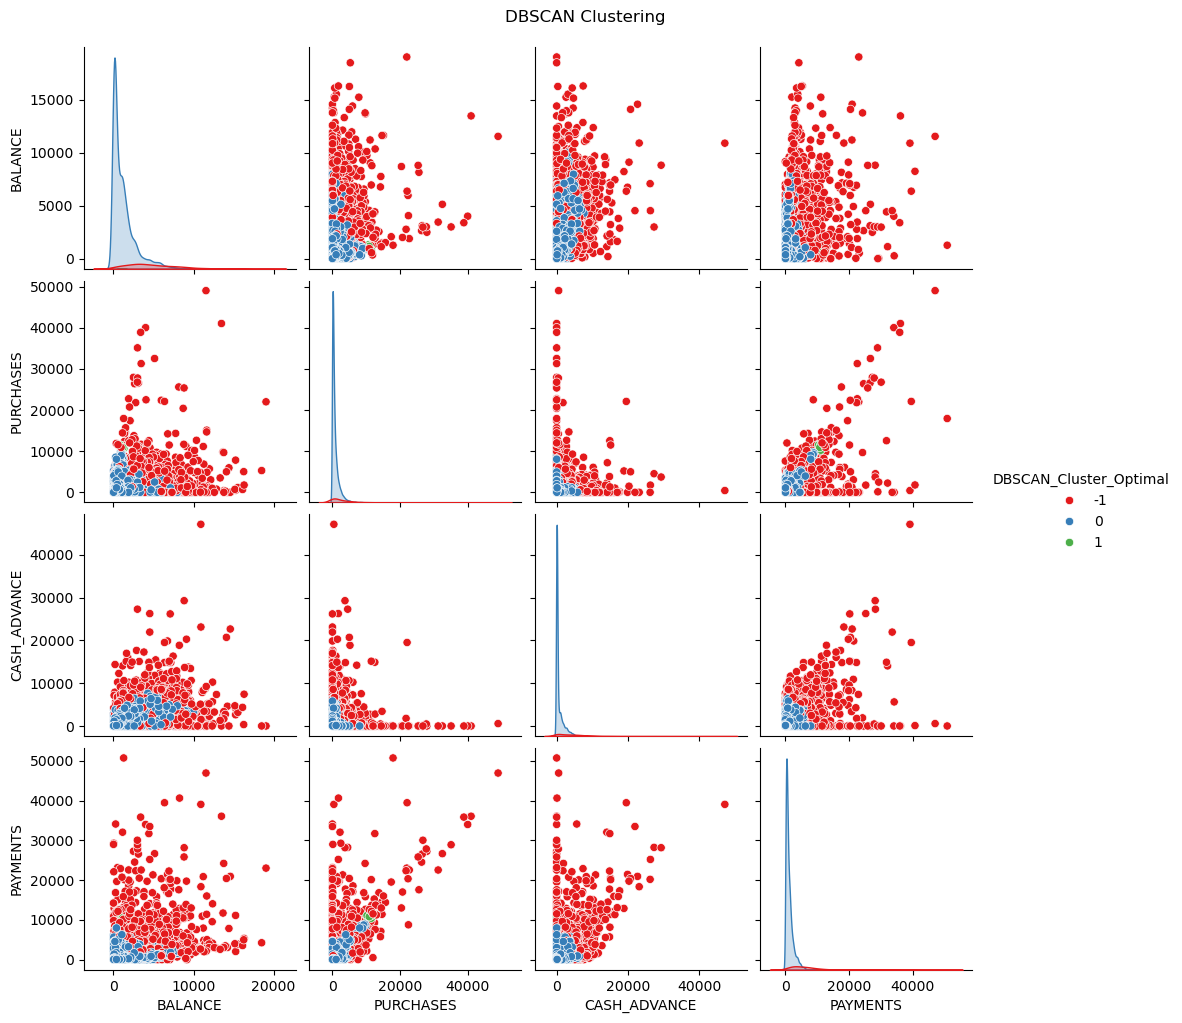

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[selected_features + ["DBSCAN_Cluster_Optimal"]],
             vars=selected_features, hue="DBSCAN_Cluster_Optimal",
             palette="Set1", diag_kind="kde")
plt.suptitle("DBSCAN Clustering", y=1.02)
plt.show()